<a href="https://colab.research.google.com/github/ashis003/Machine-Learning/blob/main/DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df = df.iloc[: ,[2,6]].values

In [5]:
df

array([[2.79000000e+01, 1.68849240e+04],
       [3.37700000e+01, 1.72555230e+03],
       [3.30000000e+01, 4.44946200e+03],
       ...,
       [3.68500000e+01, 1.62983350e+03],
       [2.58000000e+01, 2.00794500e+03],
       [2.90700000e+01, 2.91413603e+04]])

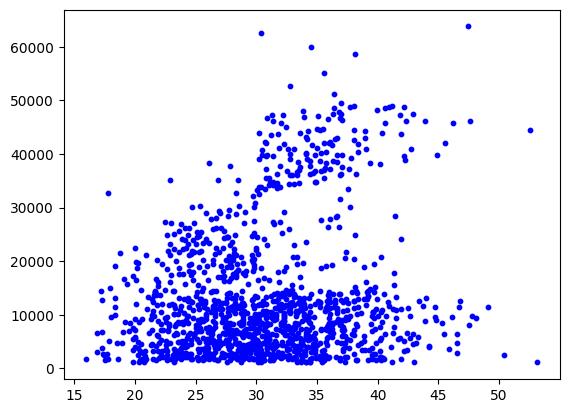

In [6]:
plt.scatter(df[: ,0], df[: ,1], s=10, c='blue')

In [7]:
from sklearn.cluster import KMeans

In [8]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

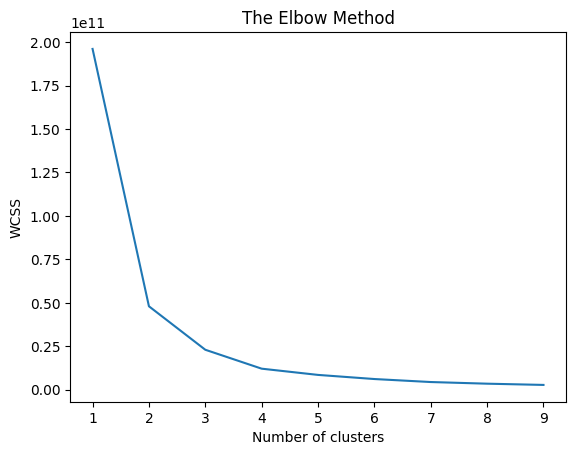

In [15]:
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.plot(k_rng,sse)

In [10]:
from sklearn.cluster import DBSCAN

In [22]:
dbscan = DBSCAN(eps=3, min_samples=3)

In [23]:
labels = dbscan.fit_predict(df)

In [24]:
np.unique(labels)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23])

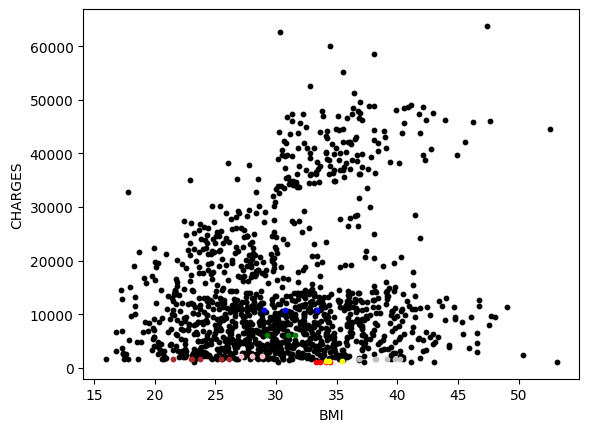

In [25]:
plt.scatter(df[labels == -1, 0], df[labels == -1, 1], s = 10, c = 'black') 

plt.scatter(df[labels == 0, 0], df[labels == 0, 1], s = 10, c = 'blue')
plt.scatter(df[labels == 1, 0], df[labels == 1, 1], s = 10, c = 'red')
plt.scatter(df[labels == 2, 0], df[labels == 2, 1], s = 10, c = 'green')
plt.scatter(df[labels == 3, 0], df[labels == 3, 1], s = 10, c = 'brown')
plt.scatter(df[labels == 4, 0], df[labels == 4, 1], s = 10, c = 'pink')
plt.scatter(df[labels == 5, 0], df[labels == 5, 1], s = 10, c = 'yellow')      
plt.scatter(df[labels == 6, 0], df[labels == 6, 1], s = 10, c = 'silver')


plt.xlabel('BMI')
plt.ylabel('CHARGES')
plt.show()

 **2nd Process**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('hr_data.csv')
data = data.iloc[:, [3, 8]]
print(data.to_markdown())
X = data.values

# standardize the data
X = StandardScaler().fit_transform(X)
dataset = pd.read_csv('hr_data.csv')

features = dataset.iloc[:, [2,3]].values

print(features.shape)


scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


dbscan = DBSCAN(eps=0.3, min_samples=2)
dbscan.fit(scaled_features)

# DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X)

# plot the results
labels = dbscan.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
colors = plt.cm.Spectral(np.linspace(0, 1, n_clusters))

for cluster, color in zip(range(n_clusters), colors):
    mask = (labels == cluster)
    plt.scatter(X[mask, 0], X[mask, 1], c=color)

# plt.title(f"DBSCAN Clustering (n_clusters={n_clusters})")
plt.xlabel("Humidity")
plt.ylabel("Temperature")
info = f"DBSCAN Clustering, No of Clusters: {n_clusters} )"
plt.title(info)


dataset['Cluster'] = labels
print(dataset['Cluster'].to_markdown())


plt.scatter(dataset['average_montly_hours'], dataset['number_project'], c=labels, cmap='viridis')
plt.xlabel('average_montly_hours')
plt.ylabel('number_project')
plt.title('DBSCAN Clustering')
plt.show()